In [71]:
"""
For qjuick plotting and tutorial of data exported using 
sn.export_to_dataframe
"""


'\nFor qjuick plotting and tutorial of data exported using \nsn.export_to_dataframe\n'

In [55]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Place the data here
savedir = "/gorilla3/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DATA_WITHOUT_CODE"

path = f"{savedir}/dfevents.pkl"
dfevents = pd.read_pickle(path)

path = f"{savedir}/dfextract.pkl"
dfextract = pd.read_pickle(path)

### Overview of data 

##### dfextract is the main data holder. It holds neural + behavioral + task data


In [58]:
# frmat is the neural data
trial = 0
frmat = dfextract.iloc[trial]["frmat"]

# it's dimension is (number_channels x time bins), where a channel is a single recording site
print(frmat.shape)

# the time labels for each time bin (in seconds), for a given trial, is here:
times = dfextract.iloc[trial]["times"]
print(times.shape)

(277, 1224)
(1224,)


Text(0.5, 1.0, 'neural activity, single trial')

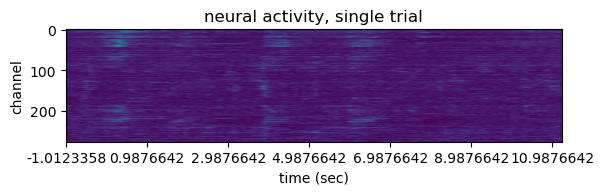

In [70]:
# Plot data acrooss all chans for this trial
fig, ax = plt.subplots()
ax.imshow(frmat)
ax.set_xticks(np.arange(len(times))[::200], labels=times[::200]);
ax.set_xlabel("time (sec)")
ax.set_ylabel("channel")
ax.set_title("neural activity, single trial")

In [75]:
# strokes holds the touchscreen data, structured as a list of np arrays, where each arary is (ntimes, 3), where
# the ntimes depends on the touchscreen smaple rate, and the three columsn are (x-coord, y-coord, time)

strokes_beh = dfextract.iloc[trial]["strokes_beh"]
print(strokes_beh[0]) # a single stroke



[[195.97177735 170.19352444   6.352     ]
 [195.78076297 169.45696518   6.354     ]
 [195.59680855 168.7399873    6.356     ]
 ...
 [ 95.31963799 227.84033941   7.078     ]
 [ 94.81287253 227.4305776    7.08      ]
 [ 94.36643213 227.06949663   7.082     ]]


In [76]:
# The coordaintes of the image is encoded thes ame way in "strokes_task".
# Here, ignore teh 3rd column -- it is a static image so time has no meaning.
strokes_task = dfextract.iloc[trial]["strokes_task"]
print(strokes_task[0]) # a single stroke

[[126.03541526 194.36539298   0.        ]
 [129.31366249 206.60048756   1.        ]
 [132.59190973 218.83558215   2.        ]
 [135.87015696 231.07067673   3.        ]
 [139.1484042  243.30577132   4.        ]
 [142.42665144 255.5408659    5.        ]
 [145.70489867 267.77596049   6.        ]
 [148.98314591 280.01105507   7.        ]
 [152.26139314 292.24614966   8.        ]
 [155.53964038 304.48124424   9.        ]
 [158.81788762 316.71633883  10.        ]
 [162.09613485 328.95143341  11.        ]
 [165.37438209 341.186528    12.        ]
 [168.65289897 328.95150567  13.        ]
 [171.93141586 316.71648333  14.        ]
 [175.20993275 304.481461    15.        ]
 [178.48844964 292.24643867  16.        ]
 [181.76696652 280.01141634  17.        ]
 [185.04548341 267.77639401  18.        ]
 [188.3240003  255.54137167  19.        ]
 [191.60251718 243.30634934  20.        ]
 [194.88103407 231.07132701  21.        ]
 [198.15955096 218.83630468  22.        ]
 [201.43806784 206.60128235  23.  

Text(0.5, 1.0, 'drawing (colored by time) overlaid on image')

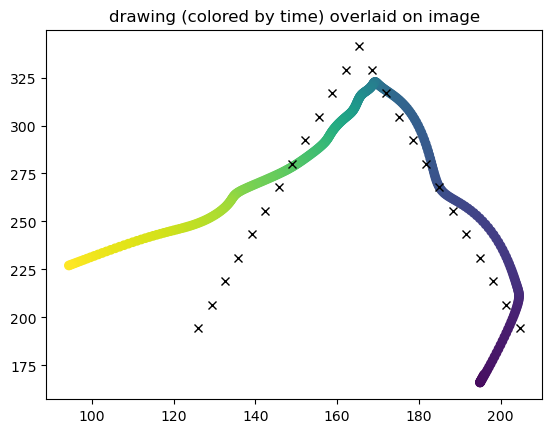

In [47]:
# Plot the image and drawing opverlaid.

fig, ax = plt.subplots()

for s in strokes_beh:
    ax.scatter(s[:,0], s[:,1], c=s[:,2], marker="o")
#     ax.plot(s[:,0], s[:,1], "")

for s in strokes_task:
    ax.plot(s[:,0], s[:,1], "xk")
    
ax.set_title("drawing (colored by time) overlaid on image")

##### dfextract holds events times. # dfevents holds times of important events within each trial

In [32]:
# the shape and location of the image are here
dfextract.iloc[trial]["shape"]
dfextract.iloc[trial]["gridloc"]


(1, 1)

In [ ]:
# each column of dfevents holds the time (in sec) of a named event within the trial, 
# such as the time of the go cue ("go"), or when he releases finger to start drawing ("first_raise")

# These are not interpretable unless you understand the task structure.
dfevents

In [50]:
# There are some extra stuff in dfevents that you can ignore for now.


##### Relating dfevents and dfextract

In [ ]:
# The two dataframes are structured identically: each row is a "trial" (see column "trial") and both
# dataframes have identical trials

In [74]:
# checkign that htey have idenitcal trials.
np.all(dfevents["trial"]==dfextract["trial"])

True